In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_part2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,7243.608962,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


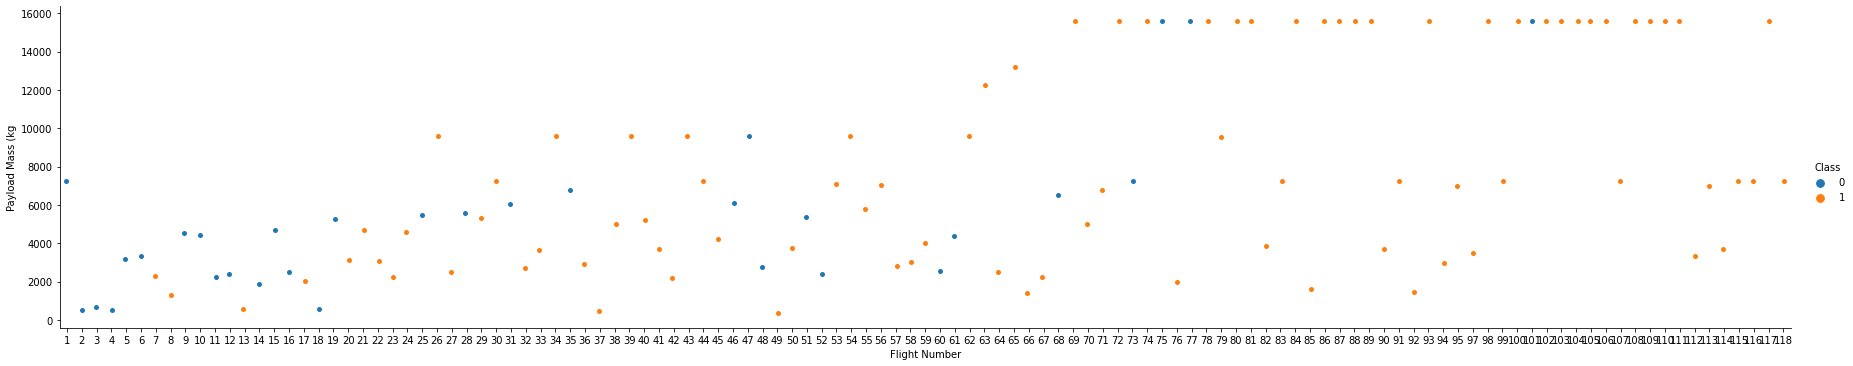

In [3]:
sns.catplot(y = 'PayloadMass', x = 'FlightNumber', data = df, hue = 'Class', aspect=5)
plt.xlabel('Flight Number')
plt.ylabel('Payload Mass (kg')
plt.show()

In [4]:
df.groupby(['LaunchSite']).mean()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
LaunchSite,,,,,,,,,,,
CCSFS SLC 40,56.857143,6934.508497,2.600000,0.785714,0.514286,0.814286,3.642857,3.2000,-80.577366,28.561857,0.671429
KSC LC 39A,68.437500,8377.926680,2.906250,0.875000,0.562500,0.875000,4.312500,3.8125,-80.603956,28.608058,0.843750
VAFB SLC 4E,50.333333,6266.200000,2.066667,0.933333,0.466667,0.866667,3.800000,3.0000,-120.610829,34.632093,0.800000


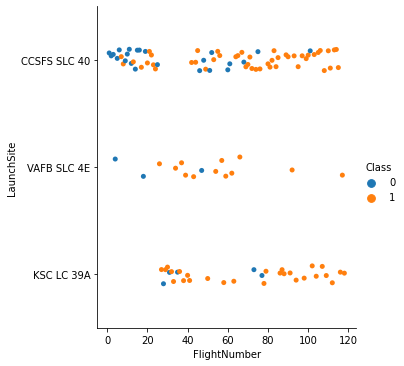

In [5]:
sns.catplot(y = 'LaunchSite', x = 'FlightNumber', data = df, hue = 'Class')

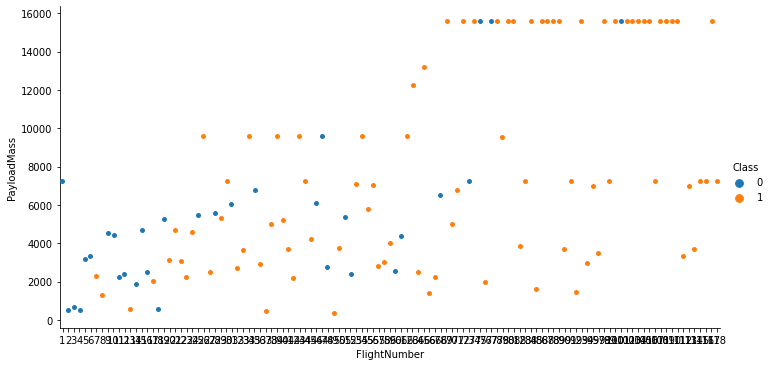

In [6]:
sns.catplot(y = 'PayloadMass', x = 'FlightNumber', data = df, hue = 'Class', aspect = 2)

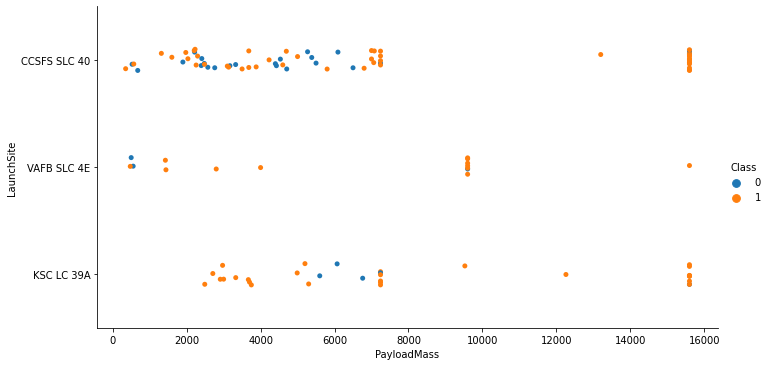

In [7]:
sns.catplot(y = 'LaunchSite', x = 'PayloadMass', data = df, hue = 'Class', aspect = 2)

In [8]:
orbit_success = df.groupby('Orbit').mean()
orbit_success.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
Orbit,,,,,,,,,,,
ES-L1,13.000000,570.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-80.577366,28.561857,1.000000
GEO,83.000000,7243.608962,2.000000,1.000000,1.000000,1.000000,5.000000,7.000000,-80.577366,28.561857,1.000000
GTO,41.700000,5094.128333,1.733333,0.666667,0.400000,0.666667,3.233333,1.633333,-80.585343,28.575718,0.566667
HEO,49.000000,350.000000,1.000000,1.000000,0.000000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
ISS,51.615385,3727.289496,1.461538,0.846154,0.307692,0.884615,3.500000,2.153846,-80.587593,28.579627,0.692308


Text(0.5, 1.0, 'Success Rate of each orbit')

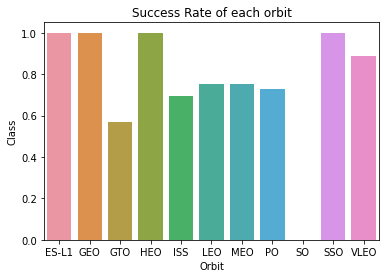

In [9]:
sns.barplot(x = orbit_success.index, y = 'Class', data = orbit_success)
plt.title('Success Rate of each orbit')

Text(0.5, 1.0, 'Orbit Type vs. Flight Number')

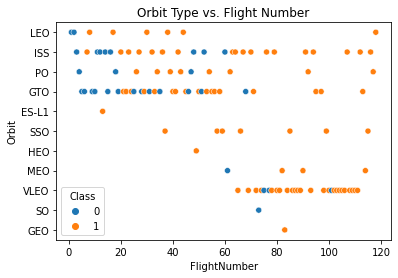

In [10]:
sns.scatterplot(x = 'FlightNumber', y = 'Orbit', hue = 'Class', data = df)
plt.title('Orbit Type vs. Flight Number')

Text(0.5, 1.0, 'Orbit type vs. Payload')

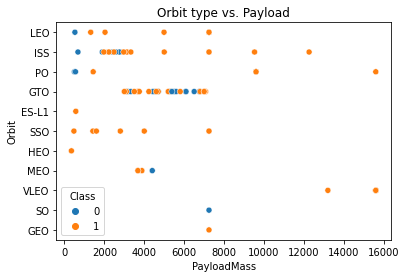

In [11]:
sns.scatterplot(x = 'PayloadMass', y = 'Orbit', hue = 'Class', data = df)
plt.title('Orbit type vs. Payload')

<AxesSubplot:ylabel='Class'>

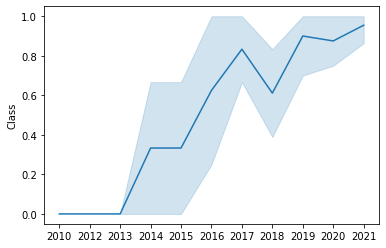

In [12]:
year = []
def Extract_year(date):
    for i in df['Date']:
        year.append(i.split("-")[0])
    return year

sns.lineplot(x = Extract_year(df['Date']), y = 'Class', data = df)

In [13]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial']]

features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,7243.608962,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [15]:
features = pd.concat([features, pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])], axis = 1)

In [16]:
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])

In [17]:
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
features_one_hot.drop(['Serial_B1051'], axis = 1, inplace = True)
features_one_hot.drop(['Orbit_LEO'], axis = 1, inplace = True)
features_one_hot.drop(['LaunchSite_CCSFS SLC 40'], axis = 1, inplace = True)
features_one_hot.drop(['LandingPad_5e9e3032383ecb267a34e7c7'], axis = 1, inplace = True)
features_one_hot.head()

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,...,Serial_B1050,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
features_one_hot.astype('float64')

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,...,Serial_B1050,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
115,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#features_one_hot.to_csv('dataset_part3.csv', index = False)

In [21]:
features.shape

(117, 88)

In [22]:
features.to_csv('dataset_part3a.csv', index = False)

In [23]:
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,...,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067
0,1,7243.608962,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
features.drop(['Orbit'], axis = 1, inplace = True)
features.drop(['LaunchSite'], axis = 1, inplace = True)
features.drop(['GridFins'], axis = 1, inplace = True)
features.drop(['Reused'], axis = 1, inplace = True)
features.drop(['Legs'], axis = 1, inplace = True)
features.drop(['LandingPad'], axis = 1, inplace = True)
features.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Serial,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,...,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067
0,1,7243.608962,1,1.0,0,B0003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,1.0,0,B0005,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,1.0,0,B0007,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,1.0,0,B1003,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,1.0,0,B1004,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
features.drop(['Serial'], axis = 1, inplace = True)
features.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067
0,1,7243.608962,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,1.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
features.to_csv('dataset_part3a.csv', index = False)